# Module 1: Machine Learning

### Machine Learning 

ML uses algorithms that can learn from data without relying on explicitely programmed methods.

### Python Tools:
* numpy:      A math library to work with n-dimensional arrays, enablingyou to do computation efficiently and effectively.
* scipy:      A collection of numerical algorithms and domain-specific toolboxes, and a good library for scientific and high-performance computation.
* matplotlib: A popular plotting package that provides 2D plotting as well as 3D plotting.

* pandas:     A library that provides high-performance, easy to use data structures.
* scikit-learn:    A collection of algorithms and tools for machine learning.

### Supervised Learning

SL-Classification classifies *labeled* data. Classification is a **categorical** prediction; Regression is a **numerical** prediction.

### Unsupervised Learning
* UL has fewer evaluation methods than SL, and more complex algorithms.
* **Dimension Reduction** reduces the number of parameters.
* **Density Estimation** is a simple concept to explore underlying structures in the data.
* **Market Basket Analysis** considers, for example, which items are customarily bought together.
* **Clustering** - the most popular UL technique - groups data points that are similar. It is used mostly for: Discovering structure, Summarization, and Anomaly detection. UL-Clustering classifies *unlabeled* data.

# Module 2: Regression
* Regression Algorithms 
* Model Evaluation 
* Model Evaluation: Overfitting & Underfitting
* Understanding Different Evaluation Models

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
UserPath = "/home/cerbero/"

ImportPath = UserPath+"Documents/edX/IBM Python Data Science Professional Certificate/IBM ML0101EN/00/"
ExportPath = UserPath+"Documents/edX/IBM Python Data Science Professional Certificate/IBM ML0101EN/01/"


In [3]:
#downloaded on Nov 6 from https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

df = pd.read_csv(ImportPath+"FuelConsumptionCo2.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc43c32cbe0>,
      dtype=object)

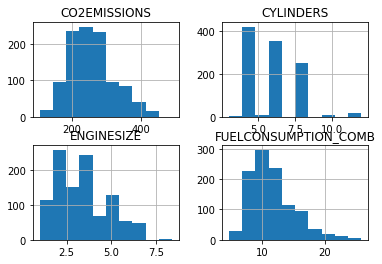

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()


/home/cerbero/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


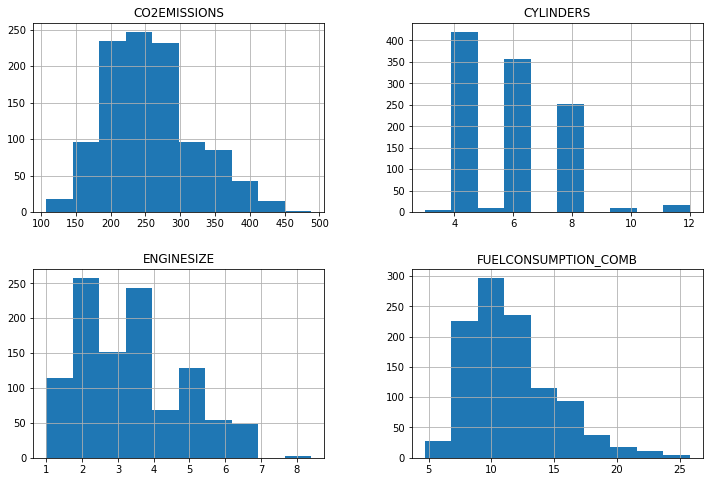

In [8]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca() #gca gets the current Axes instance on the current figure matching the given 
#keyword args, or create one.
cdf.hist(ax = ax)
# much nicer
plt.savefig(ExportPath+"Histograms.png")

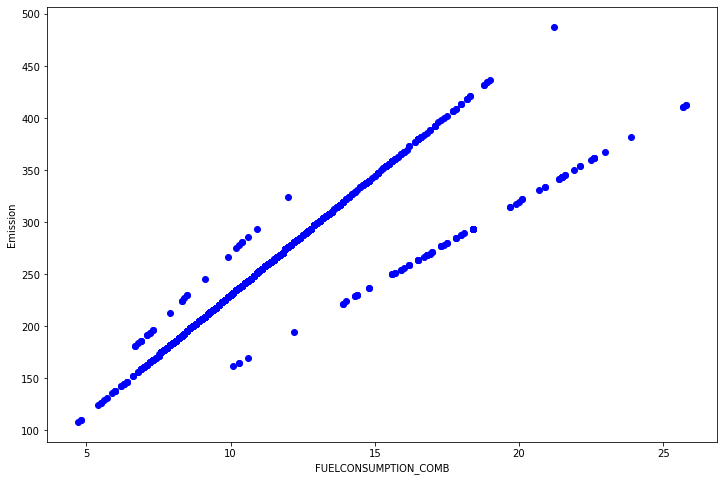

In [9]:
plt.figure(figsize = (12,8))
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.savefig(ExportPath+"Scatterplot Consumption vs Emissions.png")

This graph above is a bit odd... there appears to be two, three types of engine which Emission = f(fuel consumption) drastically varies. And linearly. Three different linear functions.

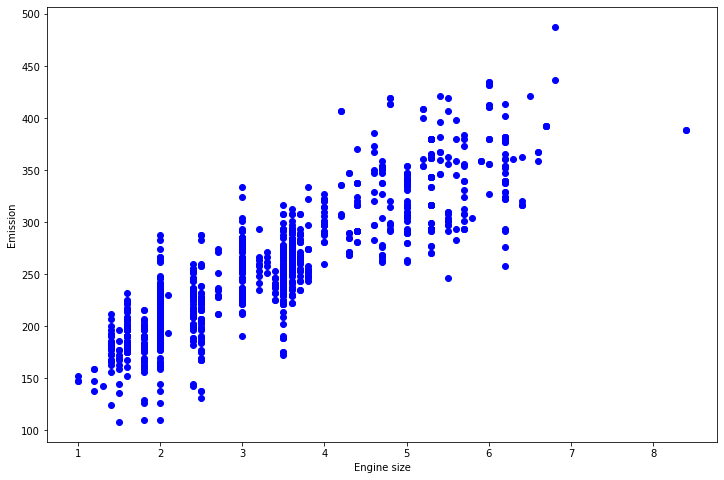

In [10]:
plt.figure(figsize = (12,8))
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.savefig(ExportPath+"Scatterplot Engine vs Emissions.png")

This looks nicer.

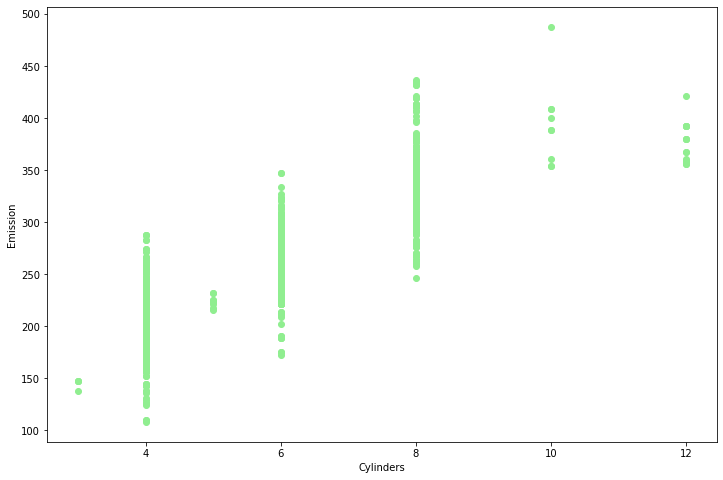

In [11]:
#plot CYLINDER vs the Emission, to see how linear is their relation:
plt.figure(figsize = (12,8))
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='lightgreen')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.savefig(ExportPath+"Scatterplot Cylinders vs Emissions.png")

In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
#this is to divide between training and testing sets in plain Python
train.describe(), test.describe()

(       ENGINESIZE   CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
 count  871.000000  871.000000            871.000000    871.000000
 mean     3.332147    5.784156             11.508037    255.585534
 std      1.409630    1.802113              3.436950     63.665427
 min      1.000000    3.000000              4.700000    108.000000
 25%      2.000000    4.000000              9.000000    207.000000
 50%      3.400000    6.000000             10.900000    248.000000
 75%      4.200000    8.000000             13.200000    294.000000
 max      8.400000   12.000000             25.800000    488.000000,
        ENGINESIZE   CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
 count  196.000000  196.000000            196.000000    196.000000
 mean     3.409184    5.841837             11.904592    259.086735
 std      1.445388    1.780373              3.685791     62.132510
 min      1.000000    3.000000              5.900000    136.000000
 25%      2.000000    4.000000              9.200000    211.2

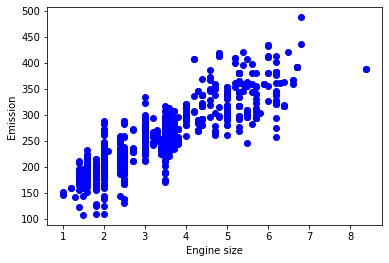

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.savefig(ExportPath+"Training Scatterplot Engine vs Emissions.png")

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.26976269]]
Intercept:  [124.73291358]


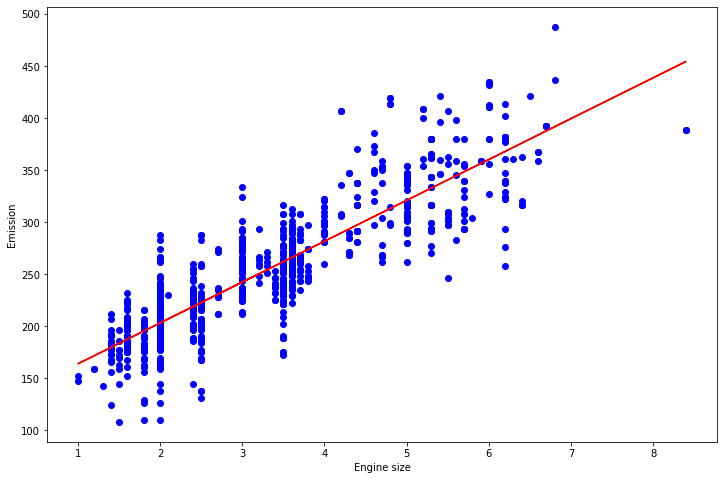

In [15]:
plt.figure (figsize = (12,8))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.savefig(ExportPath+"Training Regression Engine vs Emissions.png")

Evaluation of the model is key. Notice how we **trained** on 80% of available data, and now we **test** it on the remaining 20%.

In [16]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 21.92
Residual sum of squares (MSE): 761.86
R2-score: 0.76


In [17]:
# just for kicks, I will check the same stats on the training set. Why noy?
test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.66
Residual sum of squares (MSE): 987.88
R2-score: 0.68


In [18]:
# great stuff, we have a better R-Squared on the testing set

In [19]:
# it's clear some of the other variables can be used, in a MLRM
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

#this was the training

Coefficients:  [[ 9.9840095   7.33517753 10.31351258]]


In [20]:
#now the testing, with evaluation metrics

y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 618.89
Variance score: 0.84


In [21]:
cdf2 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]

train2 = cdf2[msk]
test2 = cdf2[~msk]

regr2 = linear_model.LinearRegression()
x = np.asanyarray(train2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train2[['CO2EMISSIONS']])
regr2.fit (x, y)
# The coefficients
print ('Coefficients: ', regr2.coef_)

y_hat2= regr2.predict(test2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test2[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat2 - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(x, y))


Coefficients:  [[10.01717704  6.86817185  7.00570102  2.88644689]]
Residual sum of squares: 624.66
Variance score: 0.84


In [22]:
#Not much better! Interesting

* Training and Testing in the same dataset ("single fold") leads to overfitting; high "training accuracy"; low "out-of-sample accuracy."
* Train-Test split avoids low-accuracy in out-of-sample predictions
* There are some problems due to the high dependency on the TT datasets
* K-Fold Cross-Validation fixes those issues, averaging the results of different "folds"
* KFCV, in its simplest form, performs multiple train/test splits using the same dataset where each split is different. The predicition results are averaged to produce a more consistent out-of-sample accuracy.


### What is “non-linear regression”?
+ Non-linear regression is a method to model a non-linear relationship between the depe ndent variable and a set of independent variables.
+ For a model to be considered non-linear, y-hat  must be a non-linear function of the **parameters θ**, not necessarily the features x.
+ When it comes to non-linear equation, it can be the shape of exponential, logarithmic, and logistic, or many other types.
+ As you can see, in all of these equations, the change of y-hat depends on changes in the parameters θ, not necessarily on x only.
+ That is, **in non-linear regression, a model is non-linear by parameters.** Check the below figure and the examples of parameters θ.

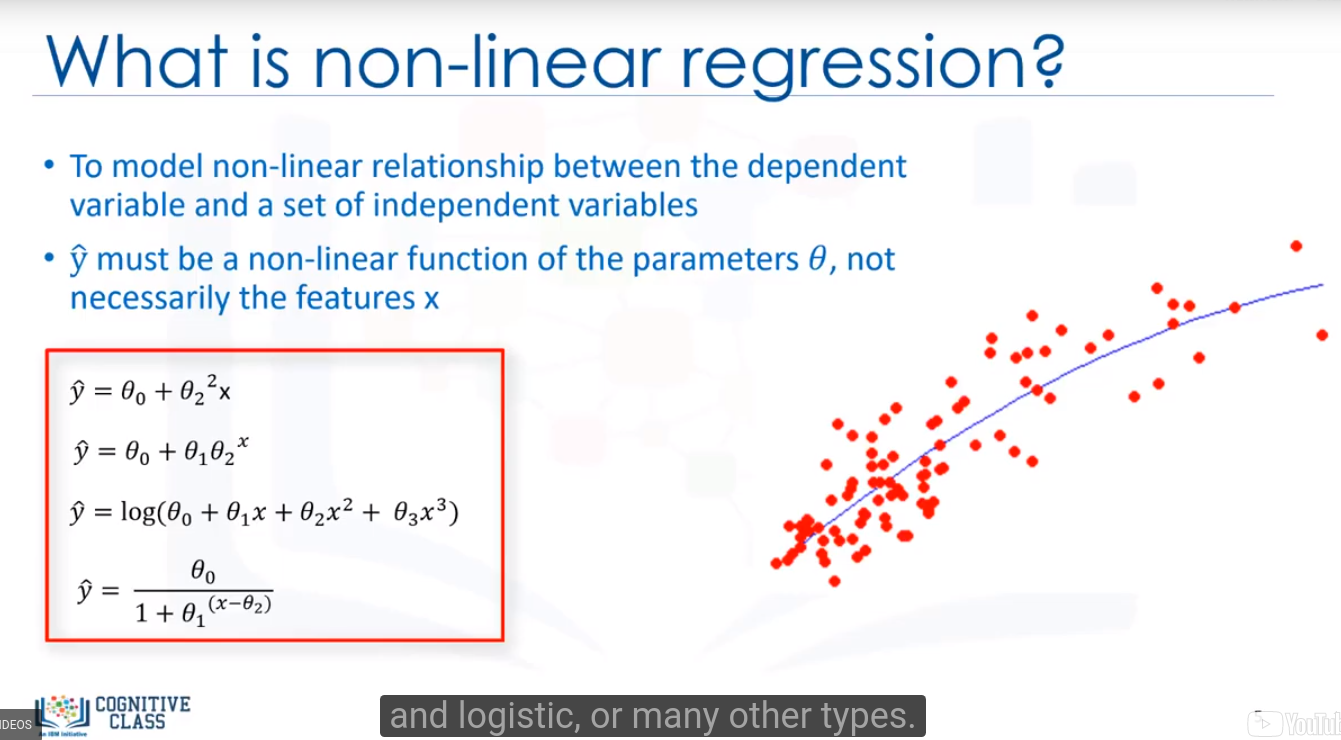

In [30]:
from IPython.display import display, Image
display(Image(filename=ExportPath+"Selection_039.png"))

# plt.figure()
# plt.imshow(ExportPath+"Selection_039.png") #likely not an array-like or PIL image (see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html)

Text(0.5, 0, 'Indepdendent Variable')

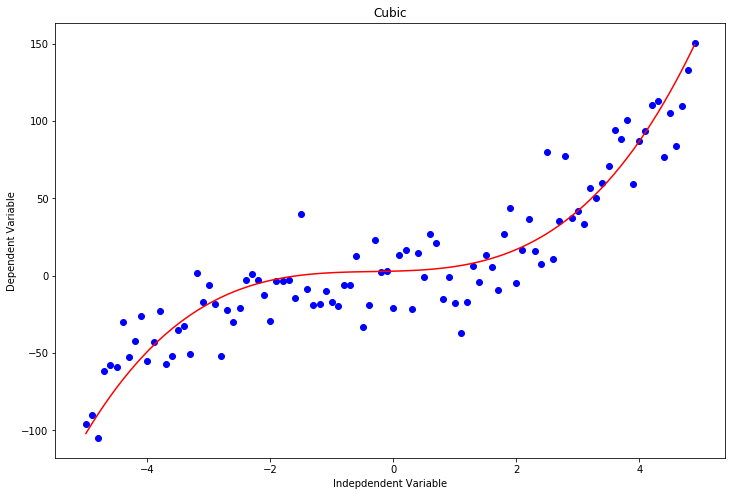

In [49]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.figure (figsize = (12,8))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.title("Cubic")
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')


Text(0.5, 0, 'Indepdendent Variable')

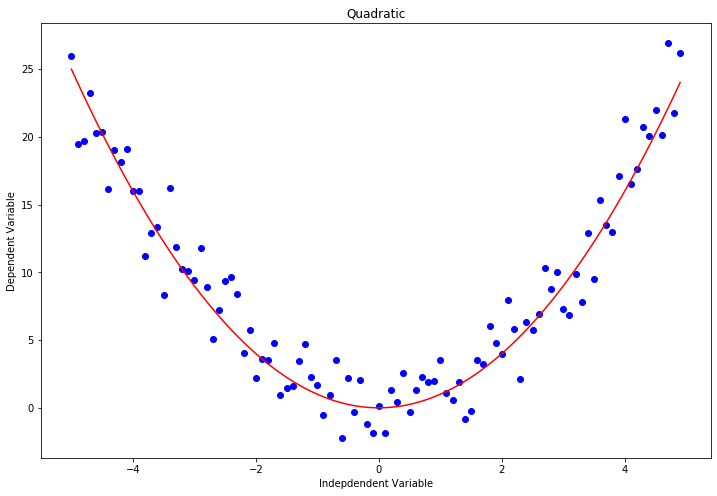

In [48]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.figure (figsize = (12,8))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.title("Quadratic")
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')


Text(0.5, 0, 'Indepdendent Variable')

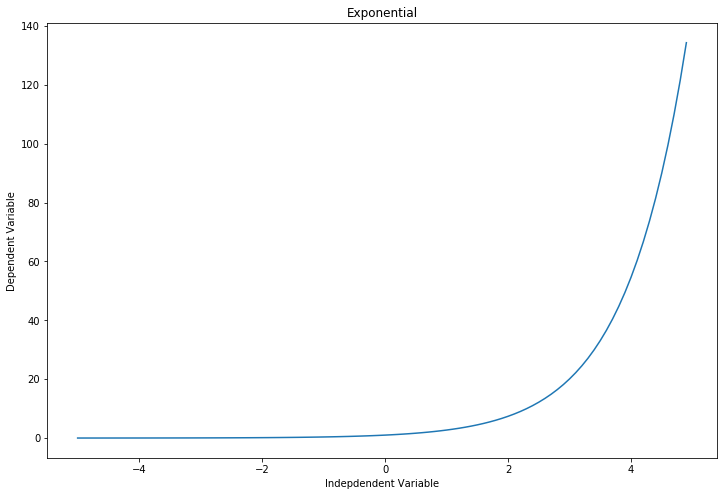

In [47]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.figure (figsize = (12,8))
plt.title("Exponential")

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')


/home/cerbero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Indepdendent Variable')

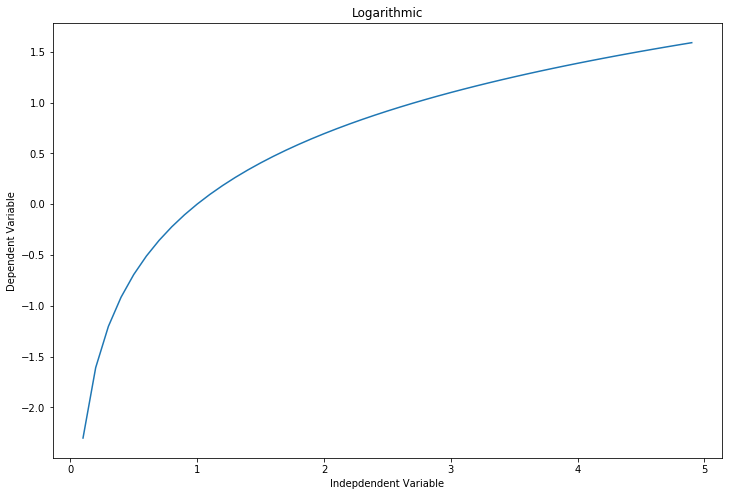

In [50]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.figure (figsize = (12,8))
plt.title("Logarithmic")

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')

Text(0.5, 0, 'Indepdendent Variable')

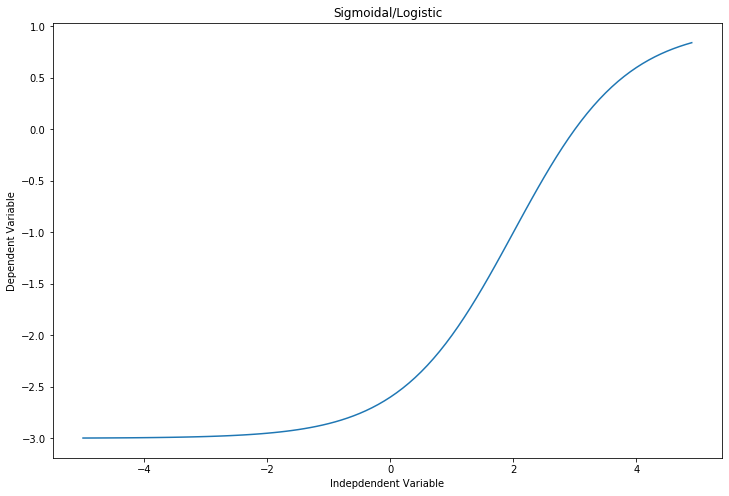

In [51]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

plt.figure (figsize = (12,8))
plt.title("Sigmoidal/Logistic")

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')

In [52]:
# got data from https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

df = pd.read_csv(ImportPath+"china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


Text(0.5, 0, 'Year')

<Figure size 576x360 with 0 Axes>

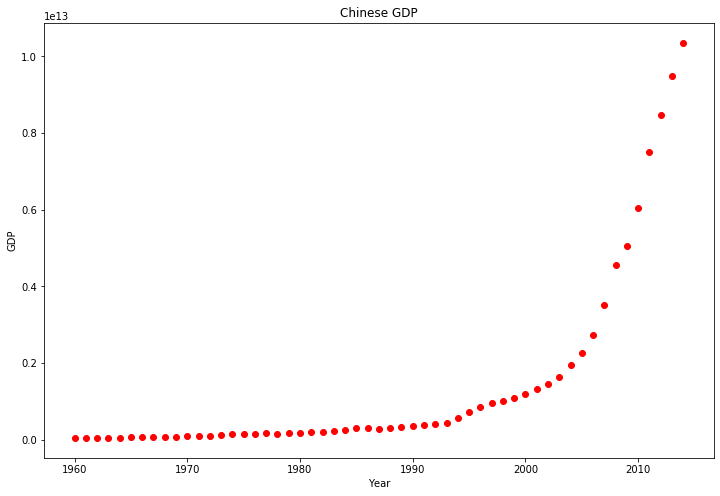

In [54]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)

plt.figure (figsize = (12,8))
plt.title("Chinese GDP")

plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')

In [ ]:
#Looks like a sigmoid function

In [55]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

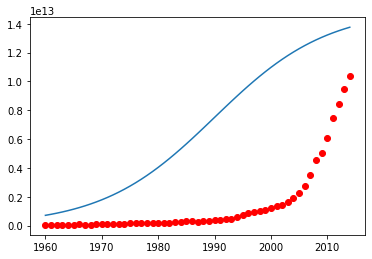

In [56]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [57]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [58]:
#optimizing the parameters
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


Text(0.5, 0, 'Year')

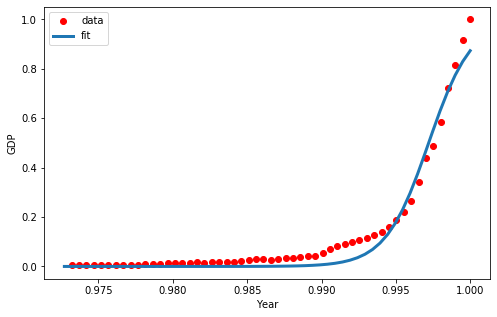

In [59]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')

In [60]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.94


In [23]:
# df.to_csv(ExportPath+df = pd.read_csv("FuelConsumption.csv"))